In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

OnlineNewsPopularity = pd.read_csv("OnlineNewsPopularity.csv")
print(OnlineNewsPopularity.columns)
print(OnlineNewsPopularity.shape)
OnlineNewsPopularity

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    OnlineNewsPopularity.drop([' shares', 'url'], axis = 1),
    OnlineNewsPopularity[' shares'],
    test_size = 0.2,
    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(31715, 59)
(7929, 59)


In [4]:
OnlineNewsPopularity.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
cleaned = OnlineNewsPopularity.drop(['url'], axis = 1)

# Response

<AxesSubplot:xlabel=' shares', ylabel='Density'>

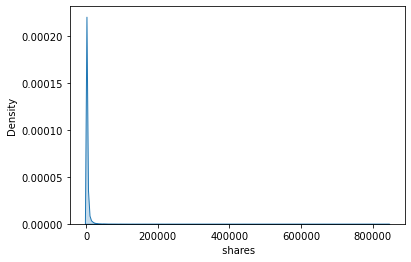

In [22]:
response_clean = cleaned[' shares']
sns.kdeplot(response_clean, fill=True, bw_method = .1)
#sns.displot(data = cleaned, x = ' shares')

# Categorical

In [23]:
cleaned_cat = cleaned.loc[:, [' n_tokens_title',' num_keywords',' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_max',  ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend',' min_positive_polarity', ' max_positive_polarity',' min_negative_polarity',
       ' max_negative_polarity', ' shares']]
cleaned_cat

,n_tokens_title,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_max,...,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,shares
0,12.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.100000,0.70,-0.600,-0.200000,593
1,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.033333,0.70,-0.125,-0.100000,711
2,9.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.100000,1.00,-0.800,-0.133333,1500
3,9.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.136364,0.80,-0.600,-0.166667,1200
4,13.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.033333,1.00,-0.500,-0.050000,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,843300.0,...,0.0,0.0,0.0,0.0,0.0,0.100000,0.75,-0.500,-0.125000,1800
39640,12.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,843300.0,...,0.0,0.0,0.0,0.0,0.0,0.136364,0.70,-0.400,-0.100000,1900
39641,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,843300.0,...,0.0,0.0,0.0,0.0,0.0,0.136364,0.50,-0.800,-0.166667,1900
39642,6.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,843300.0,...,0.0,0.0,0.0,0.0,0.0,0.062500,0.50,-0.500,-0.012500,1100


In [24]:
cleaned_cat.isnull().sum()

 n_tokens_title                   0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_max                       0
 weekday_is_monday                0
 weekday_is_tuesday               0
 weekday_is_wednesday             0
 weekday_is_thursday              0
 weekday_is_friday                0
 weekday_is_saturday              0
 weekday_is_sunday                0
 is_weekend                       0
 min_positive_polarity            0
 max_positive_polarity            0
 min_negative_polarity            0
 max_negative_polarity            0
 shares                           0
dtype: int64

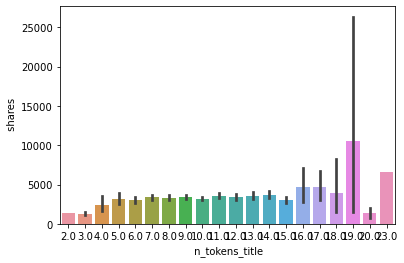

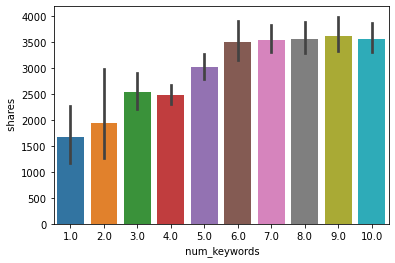

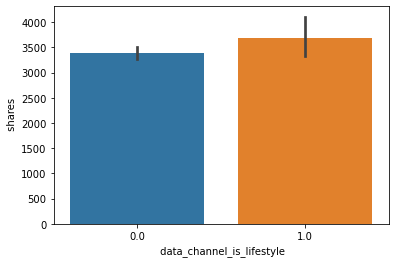

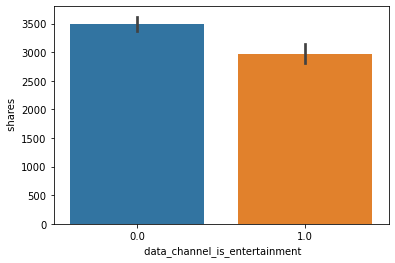

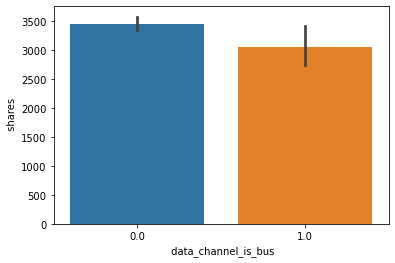

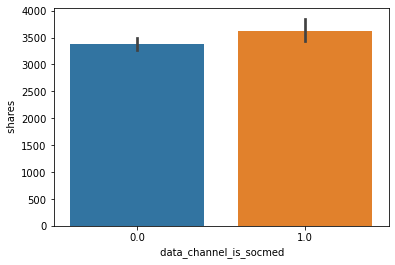

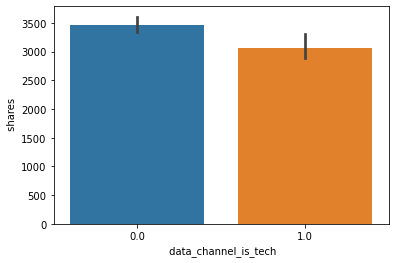

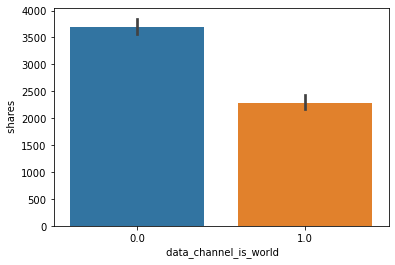

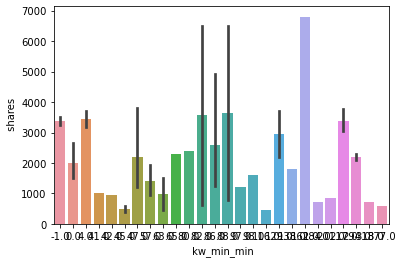

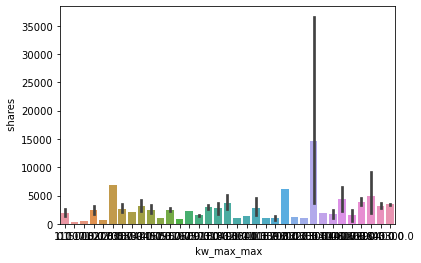

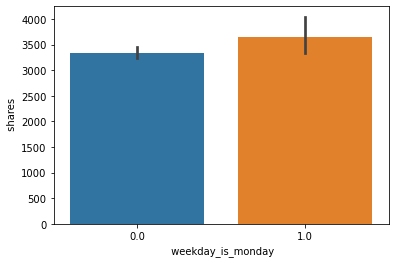

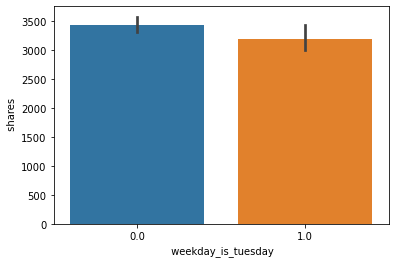

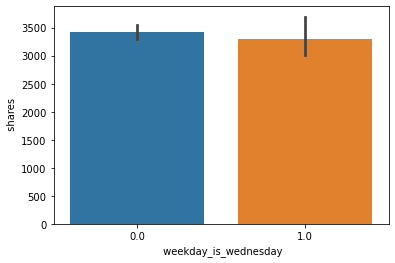

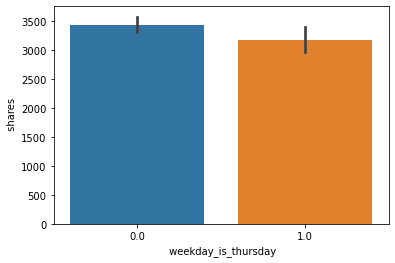

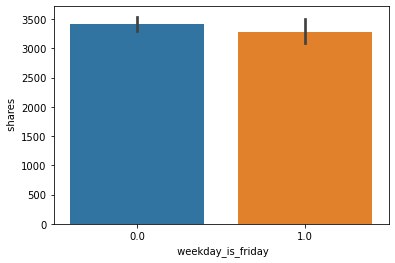

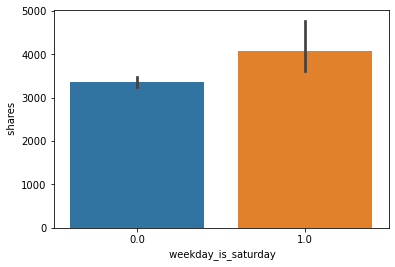

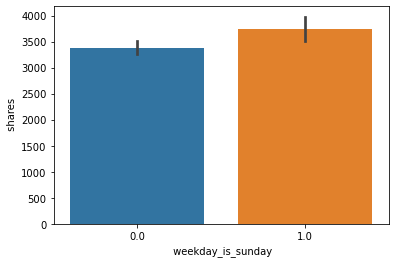

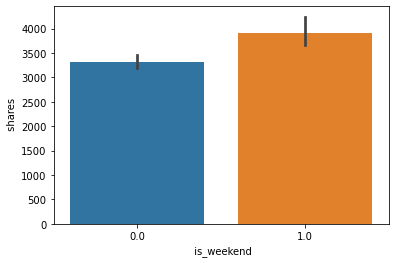

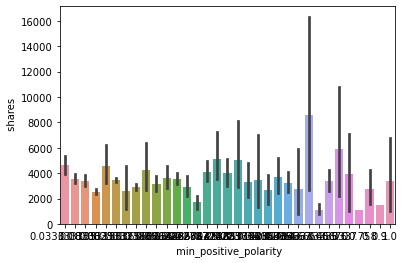

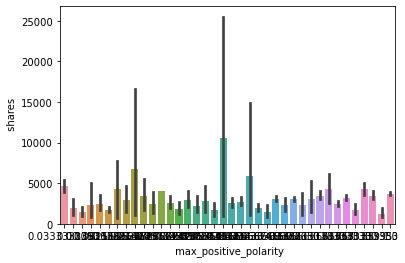

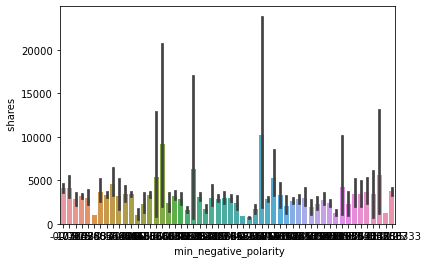

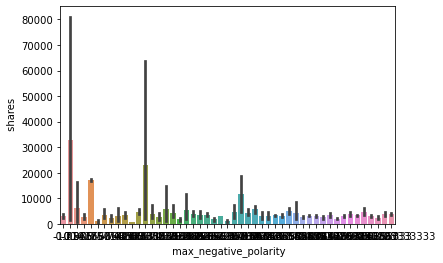

In [25]:
for x in cleaned_cat.columns:
    if x != ' shares':
        sns.barplot(x= x, y = ' shares', data = cleaned_cat)
        plt.show()

# Continuous

In [26]:
cleaned_con = cleaned.drop([' n_tokens_title',' num_keywords',' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_max',  ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend',' min_positive_polarity', ' max_positive_polarity',' min_negative_polarity',
       ' max_negative_polarity'], axis=1)
cleaned_con

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.013699,0.769231,0.230769,0.378636,-0.350000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.015686,0.733333,0.266667,0.286915,-0.118750,0.000000,0.000000,0.500000,0.000000,711
2,731.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.009479,0.857143,0.142857,0.495833,-0.466667,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.020716,0.666667,0.333333,0.385965,-0.369697,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.012127,0.860215,0.139785,0.411127,-0.220192,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.014451,0.722222,0.277778,0.333791,-0.260000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.009146,0.812500,0.187500,0.374825,-0.211111,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.024887,0.576923,0.423077,0.307273,-0.356439,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.023460,0.466667,0.533333,0.236851,-0.205246,0.000000,0.000000,0.500000,0.000000,1100


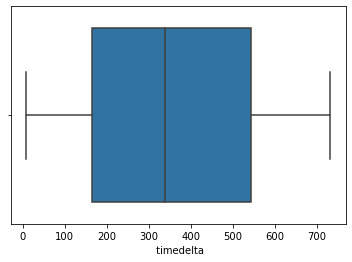

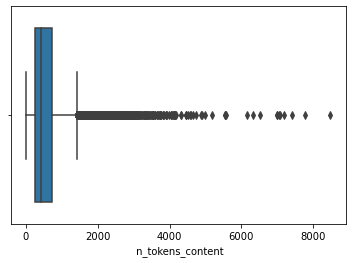

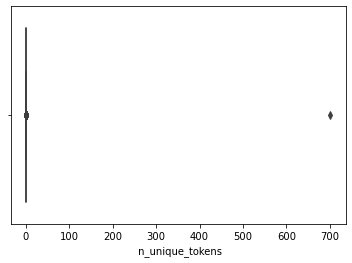

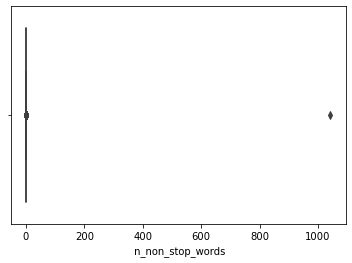

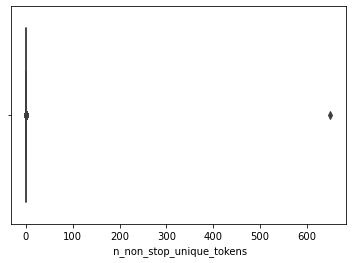

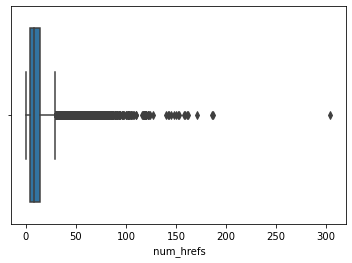

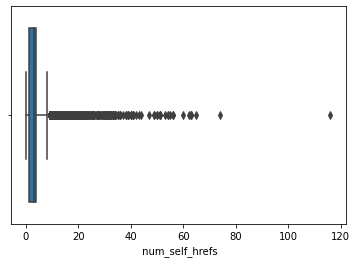

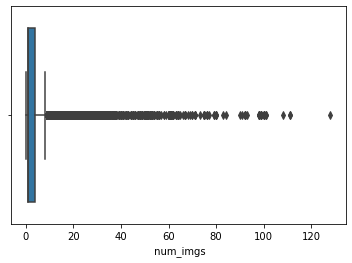

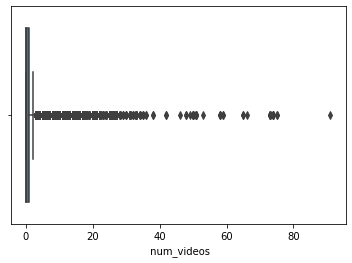

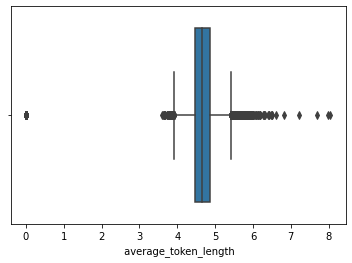

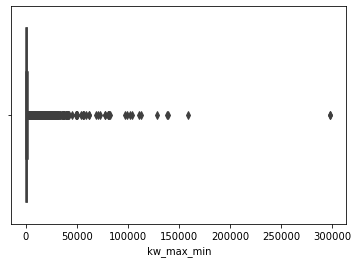

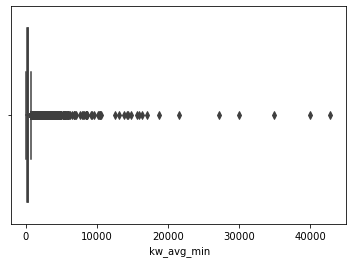

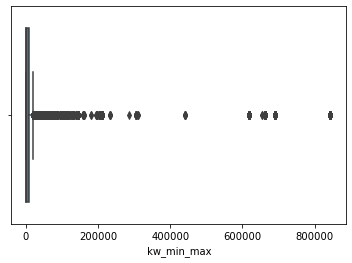

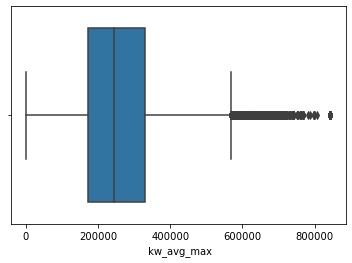

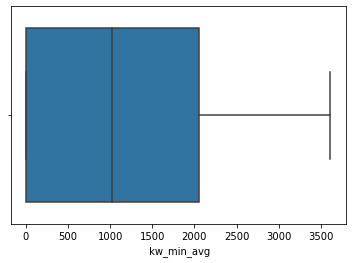

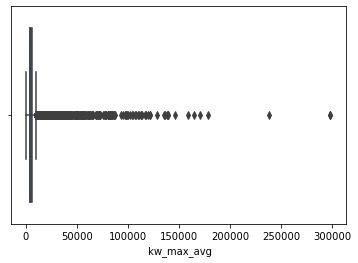

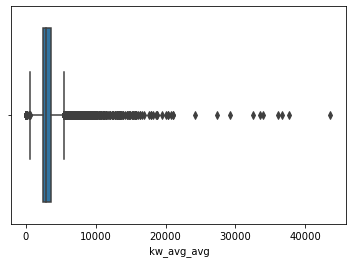

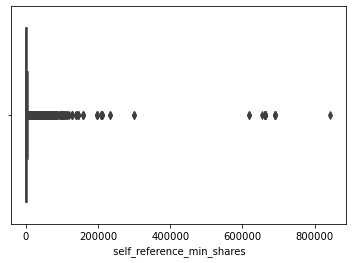

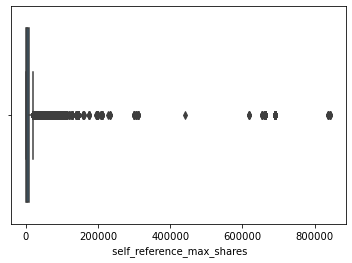

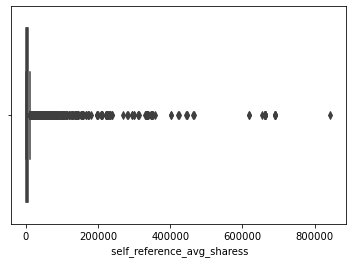

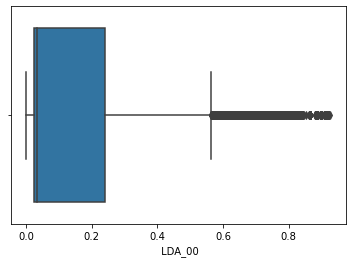

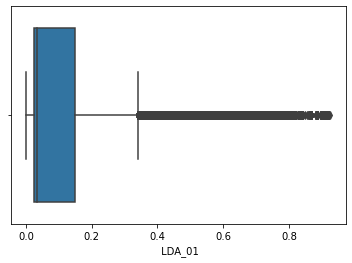

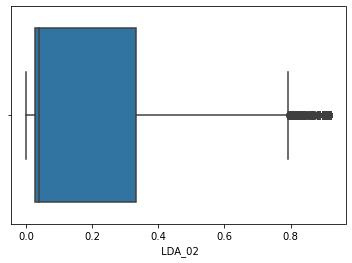

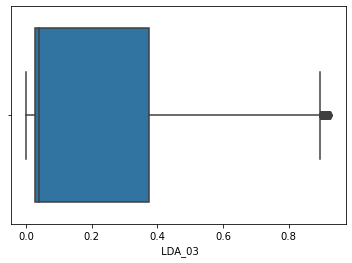

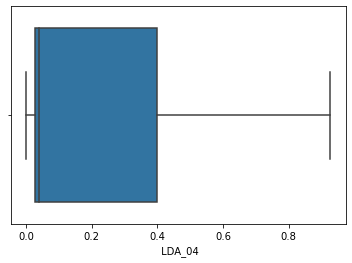

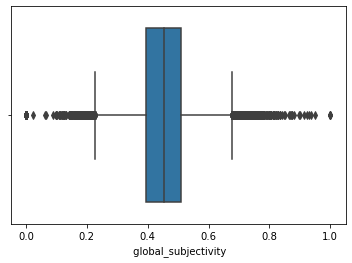

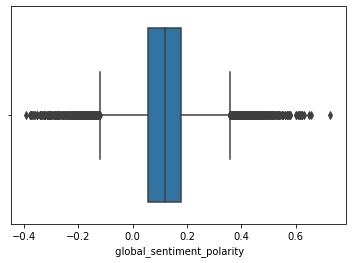

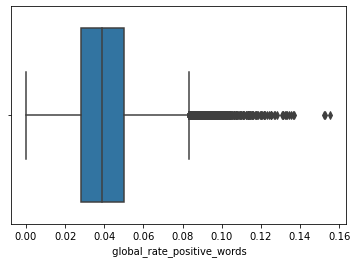

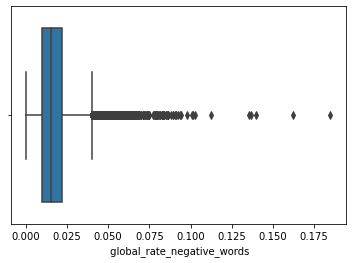

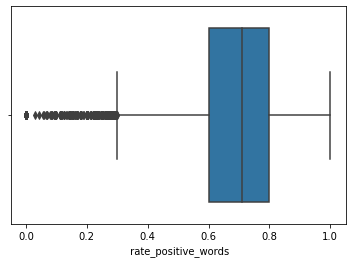

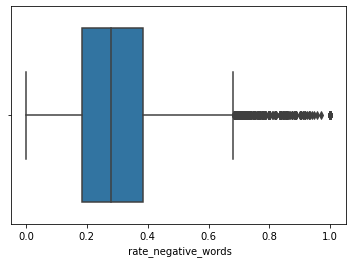

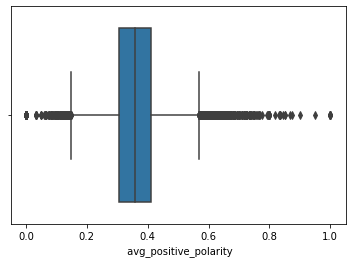

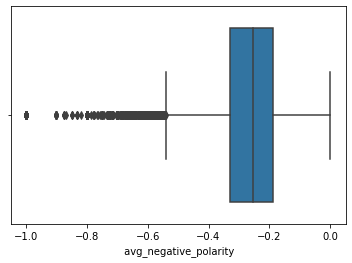

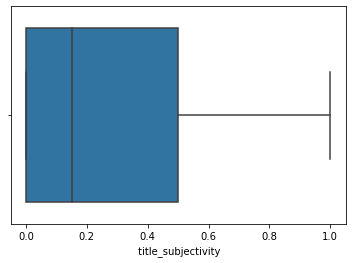

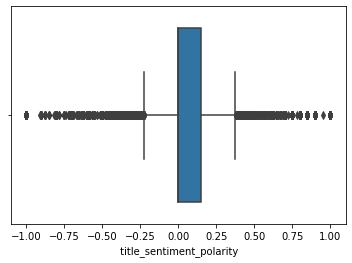

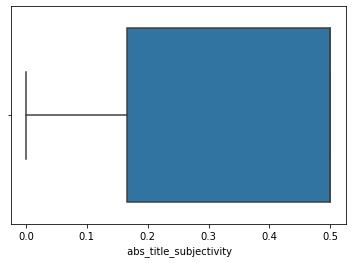

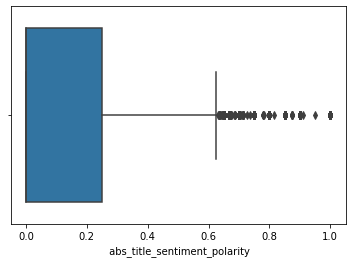

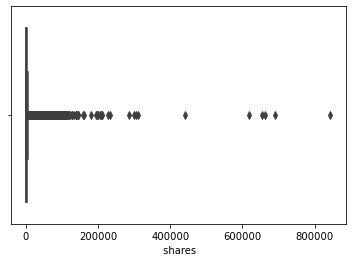

In [33]:
for x in cleaned_con:
    sns.boxplot(x= cleaned_con[x])
    plt.show()

# All

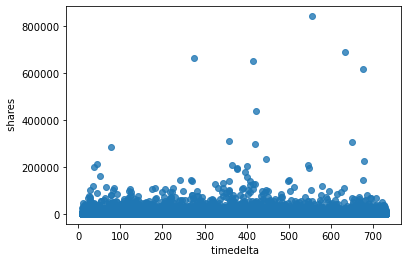

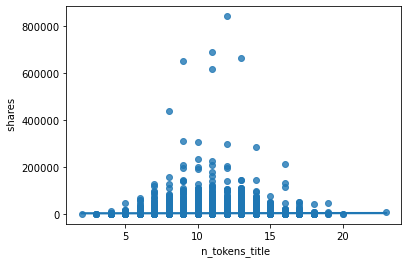

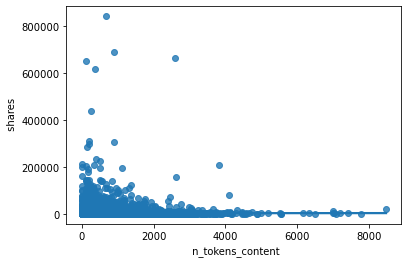

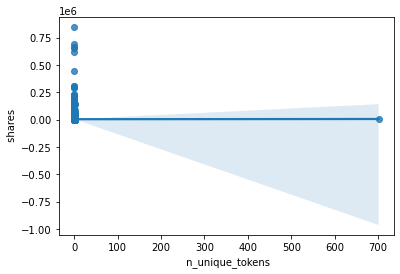

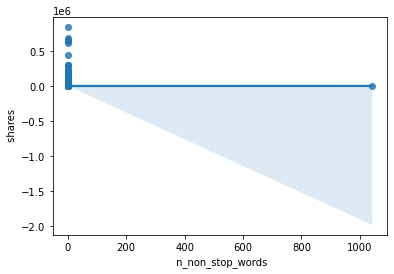

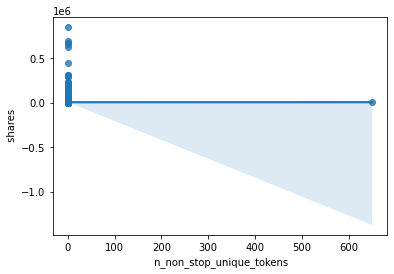

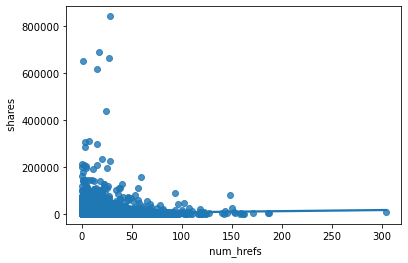

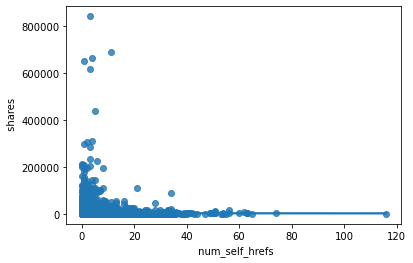

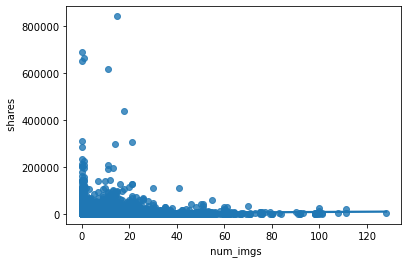

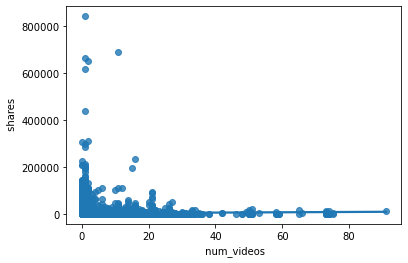

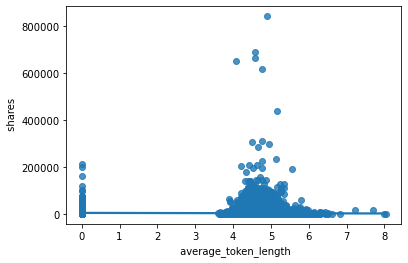

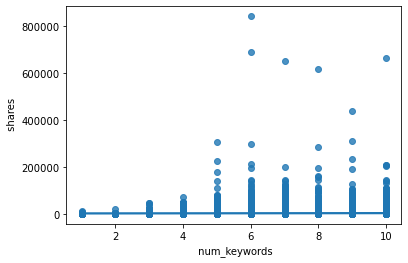

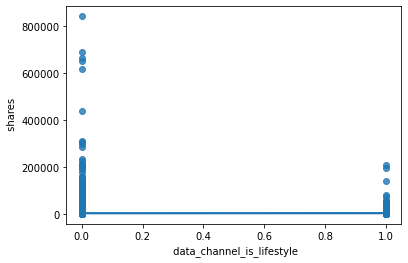

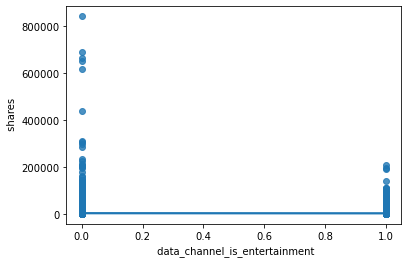

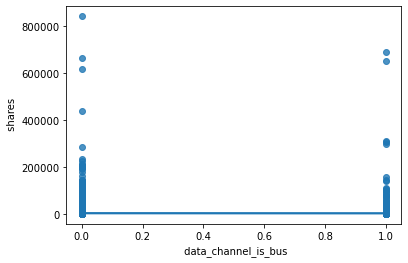

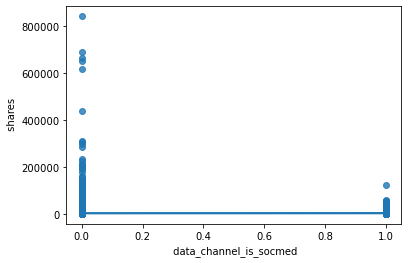

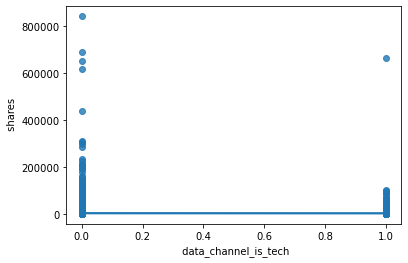

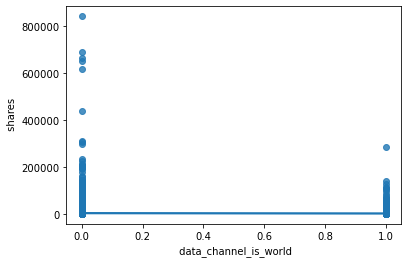

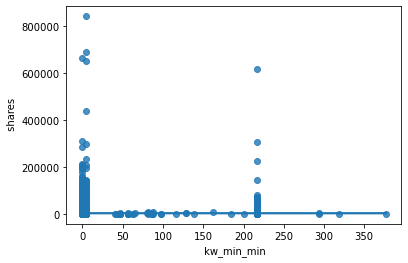

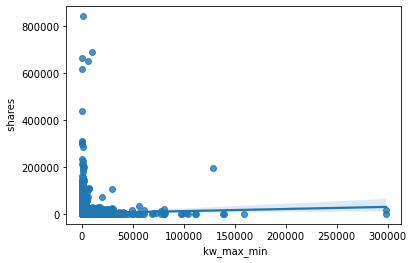

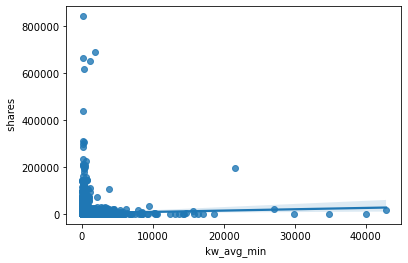

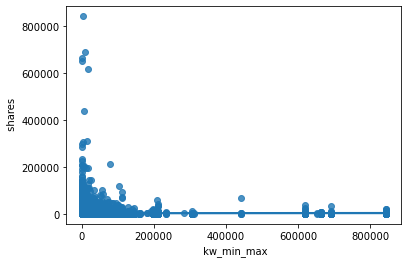

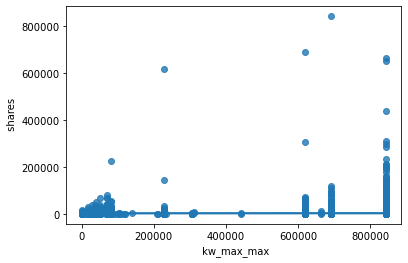

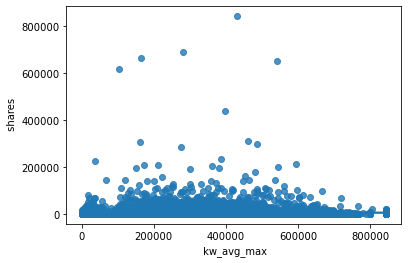

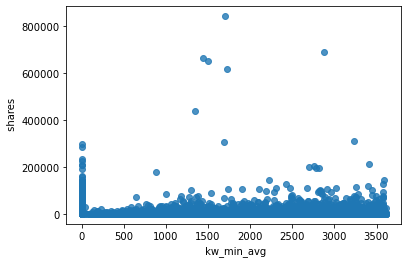

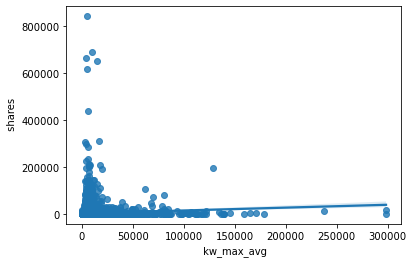

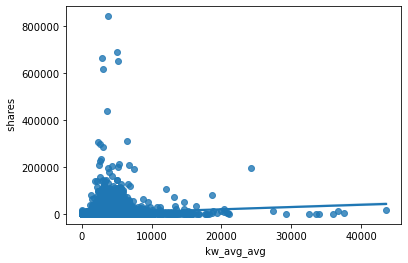

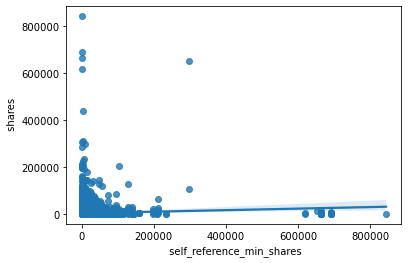

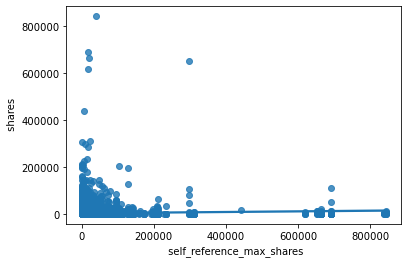

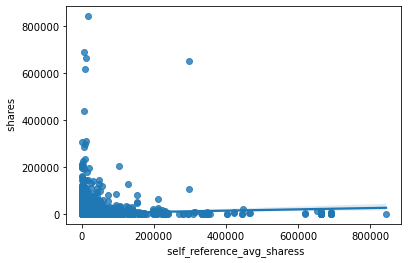

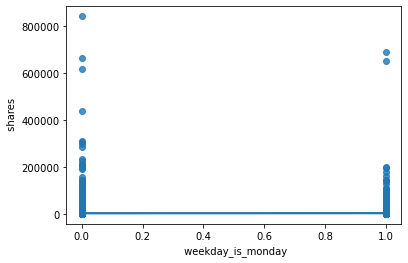

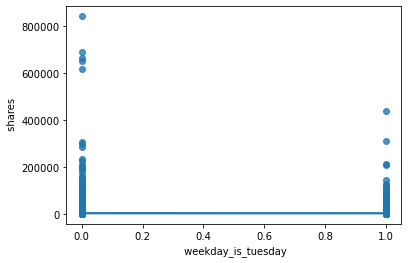

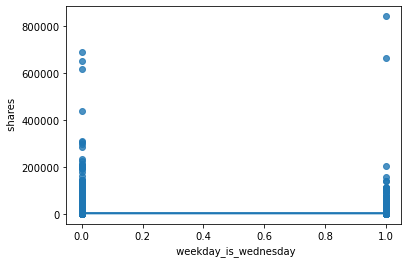

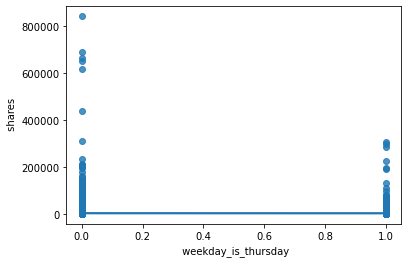

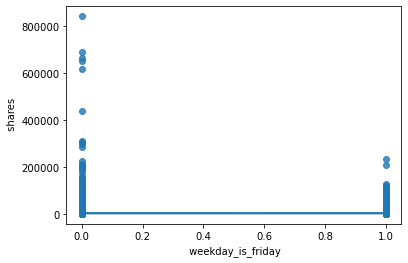

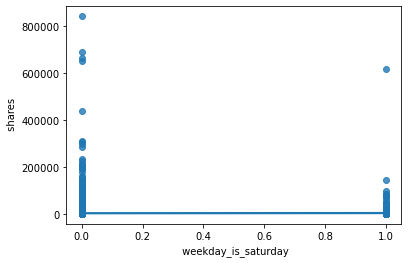

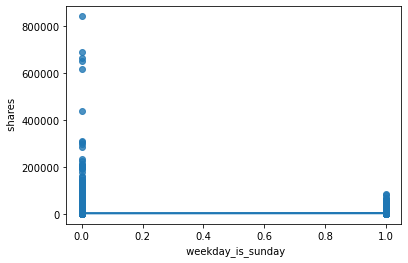

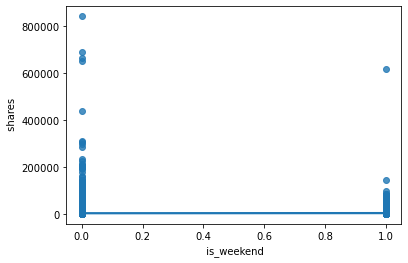

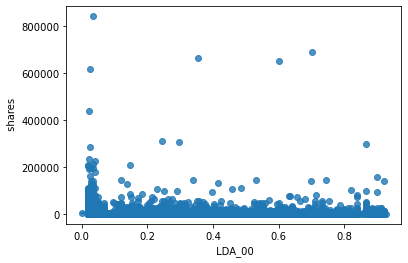

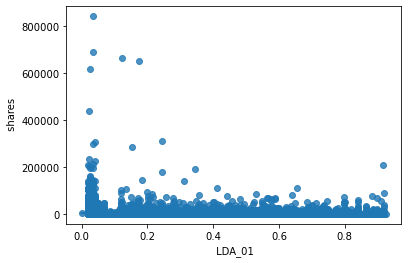

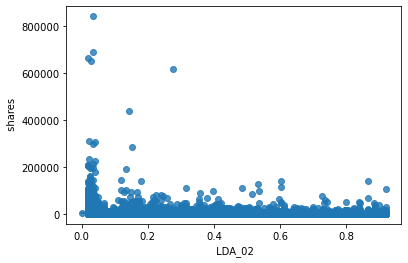

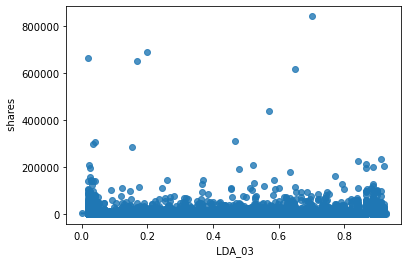

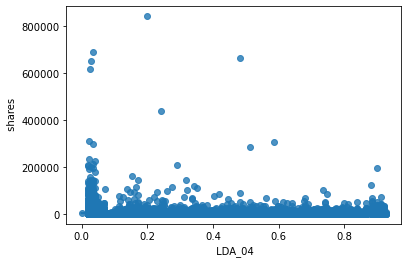

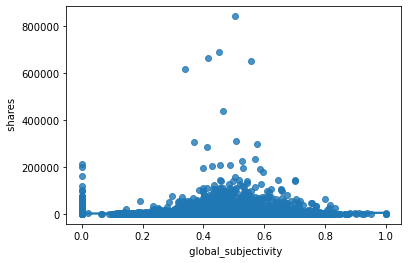

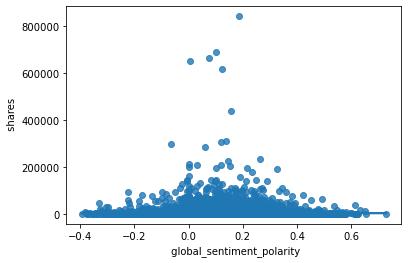

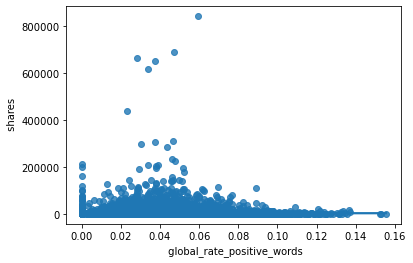

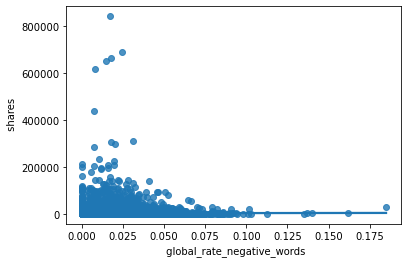

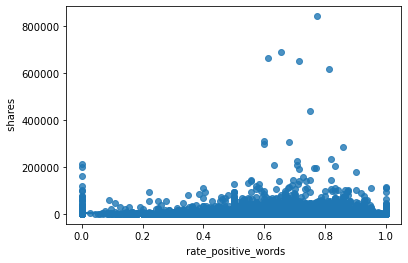

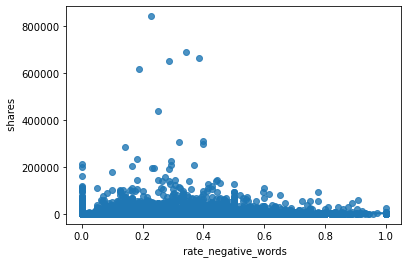

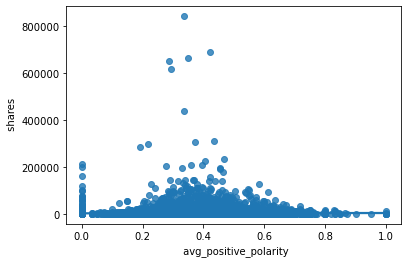

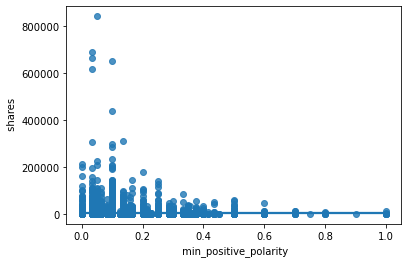

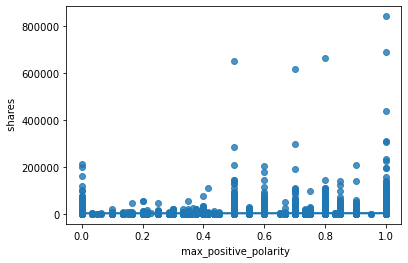

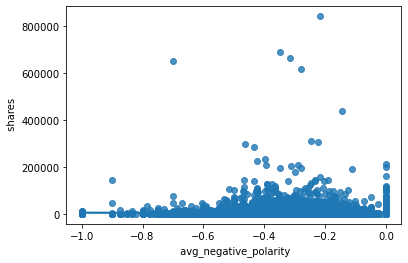

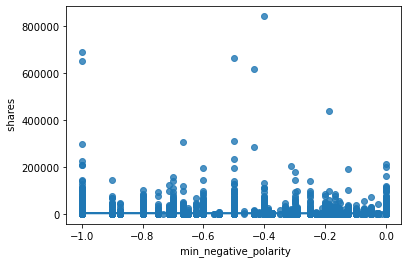

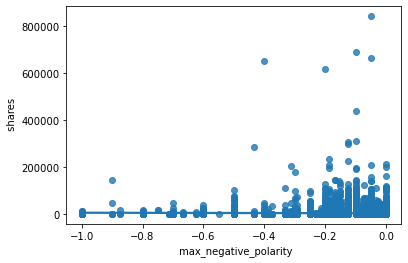

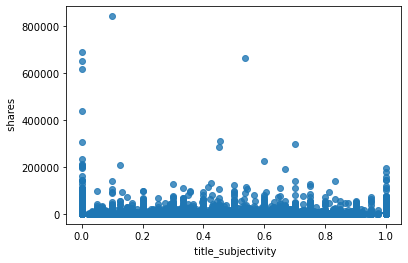

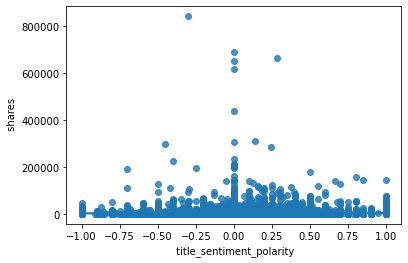

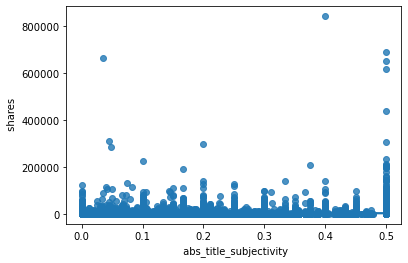

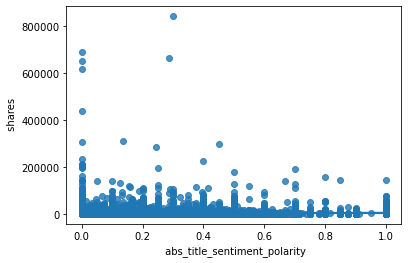

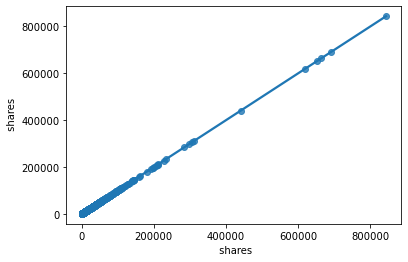

In [29]:
for x in cleaned:
    sns.regplot(x=x, y= ' shares', data=cleaned)
    plt.show()

# Predicted vs Actual

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    OnlineNewsPopularity.drop([' shares', 'url'], axis = 1),
    OnlineNewsPopularity[' shares'],
    test_size = 0.2,
    random_state = 42)

In [7]:
# Using XGBoost as my base model
import xgboost as xgb
model = xgb.XGBRegressor(random_state=1,max_depth=6,n_estimators=1000,
                                         learning_rate = 0.01,reg_lambda=0.01).fit(X_train, y_train)
pred = model.predict(X_test)

Text(0, 0.5, 'Predicted')

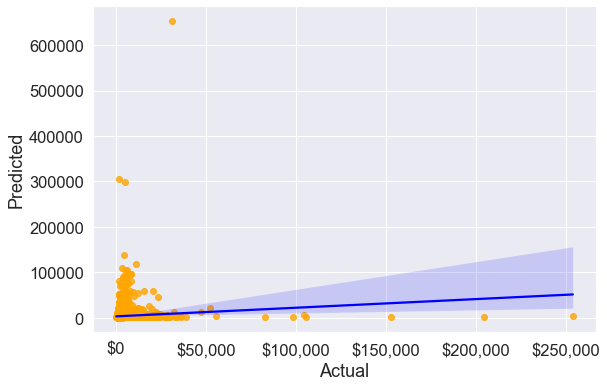

In [12]:
#Scatterplot and trendline with seaborn
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax=sns.regplot(x = pred, y = y_test, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')